In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
nueva_ruta = 'C:\\Users\\REYES LUIS\\Downloads\\cursos\\Curso Data Science CoderHouse\\DataSets\\Movie Recommendation System'
os.chdir(nueva_ruta)

# Levanto el archivo 
df = pd.read_csv("tmdb_5000_movies.csv",sep = ',')
# Reordenemos el dataframe
df = df[['id', 'budget', 'genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries',
                'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']]
# Importamos el segundo archivo
df_2 = pd.read_csv("tmdb_5000_credits.csv",sep = ',')

#Unamos los dos dataframes
df = pd.merge(df, df_2, on="id", how="outer")

#Cambiemos el indice
df.index = df['id']
df = df.drop('id', axis='columns')

# Vamos algunos de sus datos
print(df.head())


           budget                                             genres  \
id                                                                     
19995   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026   250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529   260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage  \
id                                                     
19995                    http://www.avatarmovie.com/   
285     http://disney.go.com/disneypictures/pirates/   
206647   http://www.sonypictures.com/movies/spectre/   
49026             http://www.thedarkknightrises.com/   
49529           http://movies.disney.com/john-carter   

                                                 keywords original_language  \
id                     

In [85]:
#Descripción de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 19995 to 25975
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [86]:
#Como podemos apreciar tenemos dos columnas con los mismos datos luego de la unión. Eliminemos una de ellas.
print(df[['title_x','title_y']].head())

                                         title_x  \
id                                                 
19995                                     Avatar   
285     Pirates of the Caribbean: At World's End   
206647                                   Spectre   
49026                      The Dark Knight Rises   
49529                                John Carter   

                                         title_y  
id                                                
19995                                     Avatar  
285     Pirates of the Caribbean: At World's End  
206647                                   Spectre  
49026                      The Dark Knight Rises  
49529                                John Carter  


In [87]:
#Eliminemos la columna repetida
df = df.drop(['title_y'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 19995 to 25975
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [88]:
#Veamos algunos datos generales de los campos númericos
print(df.describe())

             budget   popularity       revenue      runtime  vote_average  \
count  4.803000e+03  4803.000000  4.803000e+03  4801.000000   4803.000000   
mean   2.904504e+07    21.492301  8.226064e+07   106.875859      6.092172   
std    4.072239e+07    31.816650  1.628571e+08    22.611935      1.194612   
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000   
25%    7.900000e+05     4.668070  0.000000e+00    94.000000      5.600000   
50%    1.500000e+07    12.921594  1.917000e+07   103.000000      6.200000   
75%    4.000000e+07    28.313505  9.291719e+07   118.000000      6.800000   
max    3.800000e+08   875.581305  2.787965e+09   338.000000     10.000000   

         vote_count  
count   4803.000000  
mean     690.217989  
std     1234.585891  
min        0.000000  
25%       54.000000  
50%      235.000000  
75%      737.000000  
max    13752.000000  


In [89]:
#Veamos cuantos campos en cero tenemos
nun_missing = (df[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()
print(nun_missing)

budget          1037
popularity         1
revenue         1427
runtime           35
vote_average      63
vote_count        62
dtype: int64


In [90]:
#Calculemos los promedios de los campos en cero y reemplacemos por este dichos campos
promedios = df[['budget','popularity','revenue','runtime','vote_average','vote_count']].mean()
print(promedios)

df[['budget','popularity','revenue','runtime','vote_average','vote_count']] = df[['budget','popularity','revenue','runtime','vote_average','vote_count']].replace(0, np.nan)

df[['budget','popularity','revenue','runtime','vote_average','vote_count']] = df[['budget','popularity','revenue','runtime','vote_average','vote_count']].fillna(promedios)

nun_missing = (df[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()
print(nun_missing)

budget          2.904504e+07
popularity      2.149230e+01
revenue         8.226064e+07
runtime         1.068759e+02
vote_average    6.092172e+00
vote_count      6.902180e+02
dtype: float64
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64


In [91]:
print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64


In [92]:
# ELiminamos los registros con nulos de release_date y overview ya que son pocos
df = df.dropna(subset=['release_date', 'overview'])

# Creamos una nueva columna con true o false, si la película posee o no página web
df['website'] = df['homepage'].notna()

# Eliminamos la columna homepage
del df['homepage']

print(df.isnull().sum())


budget                    0
genres                    0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                 840
title_x                   0
vote_average              0
vote_count                0
cast                      0
crew                      0
website                   0
dtype: int64


In [93]:
# Chequiemos como quedo la nueva columna
print(df['website'].head())

id
19995     True
285       True
206647    True
49026     True
49529     True
Name: website, dtype: bool


### Análisis de datos mediante gráficos
#### MatPlotLib

*1. En nuestro primer gráfico analizaremos la distribución de los distintos géneros de las películas, ya que este será uno de los factores con el que luego intentaremos generar la recomendación de las películas.
En este caso, tenemos los géneros en la columna genres pero estos vienen como un Json ya que una película puede estar alcanzada por varios géneros distintos.*

id
19995     [Action, Adventure, Fantasy, Science Fiction]
285                        [Adventure, Fantasy, Action]
206647                       [Action, Adventure, Crime]
49026                  [Action, Crime, Drama, Thriller]
49529              [Action, Adventure, Science Fiction]
Name: genre_names, dtype: object


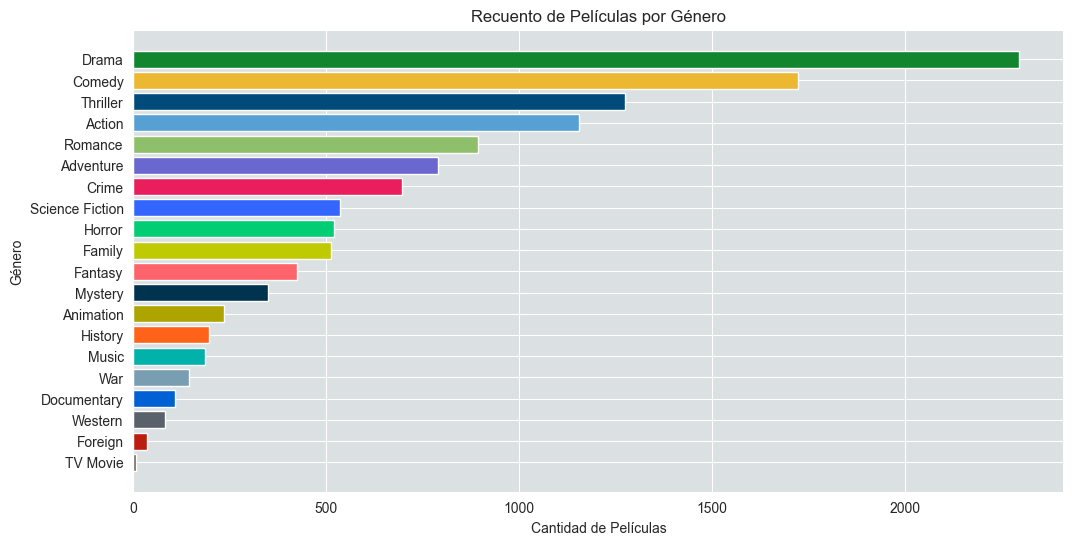

In [94]:
#Extraemos con la siguiente función los distintos nombres de los géneros
def extract_genres(genre_string):
    genres = eval(genre_string)  
    genre_names = [genre['name'] for genre in genres]  
    return genre_names

# Creamos una nueva columna 'genre_names' con los géneros extraídos
df['genre_names'] = df['genres'].apply(extract_genres)

print(df['genre_names'].head())

# Creamos un diccionario para contar la cantidad de películas por género
genre_count = {}

for genres in df['genre_names']:
    for genre in genres:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Ordenamos el diccionario por cantidad de películas de mayor a menor para mejorar la visualización del gráfico
genre_count_sorted = dict(sorted(genre_count.items(), key=lambda item: item[1], reverse=True))

genre_names = list(genre_count_sorted.keys())
movie_counts = list(genre_count_sorted.values())

#Paleta de colores para las barras
custom_colors = ['#11862f', '#ecb731', '#004b79', '#56a0d3', '#8ec06c', '#6a67ce', '#ea1d5d', '#3366FF', '#01cd74',
                 '#bfca02', '#fc636b', '#00334e', '#aea400', '#ff6319', '#00b2a9', '#799eb2', '#0061d5', '#59626a',
                 '#bb1e10', '#706357', '#4a8594']

# Usamos un Gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(genre_names, movie_counts, color=custom_colors)
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.title('Recuento de Películas por Género')
plt.gca().invert_yaxis() 
plt.gca().set_facecolor('#dbe0e3')
plt.show()

*Como podemos ver, los géneros Drama, Comedia, Thrillers y Acción tienen la mayor cantidad de películas producidas. Y por el contrario los documentales, Western, Extranjeras y Peliculas de TV tienen el menor muestreo lo que puede dificultar luego la predicción por estos últimos géneros.*

*2. En el siguiente gráfico analizaremos la producción de películas a través de los años en comparación con su popularidad.*

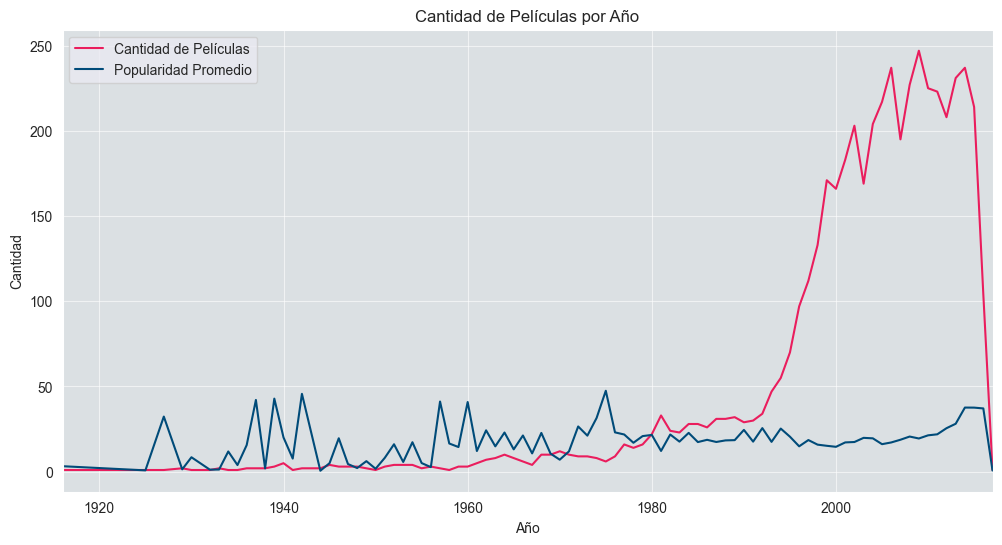

In [95]:
# Obtengamos el año de la fecha de lanzamiento para agrupar por este
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
yearly_movie_counts = df['release_year'].value_counts().sort_index()

# Limitemos el gráfico a los valores mínimos y máximos de la muestra anterior
minimo_valor = pd.to_datetime(df['release_date']).dt.year.min()
maximo_valor = pd.to_datetime(df['release_date']).dt.year.max()

# Calculemos la popularidad promedio por año
yearly_popularity = df.groupby('release_year')['popularity'].mean()

# Usemos un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_counts.index, yearly_movie_counts.values, label='Cantidad de Películas', linestyle='-', color='#ea1d5d')
plt.plot(yearly_popularity.index, yearly_popularity.values, label='Popularidad Promedio', linestyle='-', color='#004b79')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de Películas por Año')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.gca().set_facecolor('#dbe0e3')
plt.xlim(minimo_valor, maximo_valor)
plt.show()

*Como podemos ver, la producción de películas crecio enormemente sin embargo la popularidad de las mismas no mejoró. Vamos a omitir la cantidad de películas producidas pero vamos a mirar mas de cerca la popularidad de las películas ya que este es un factor que consideramos clave a la hora de recomedar otras películas.*

*3. Para analizar mejor la popularidad de las películas, veamos un top 10 de las películas mas populares y cual fue su votación promedio obtenida.*

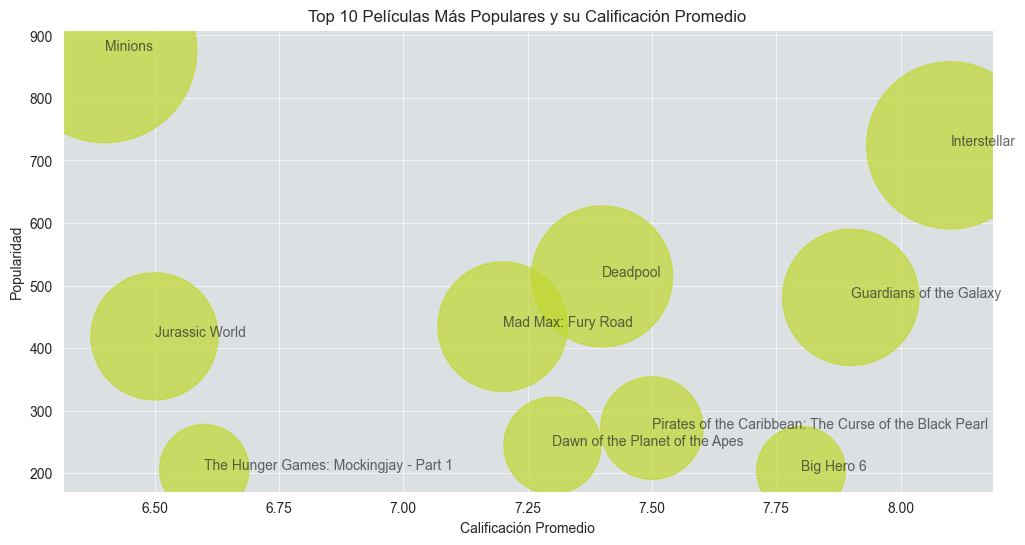

In [96]:
#Creemos nuestro top 10 de películas mas populares
top_10_movies = df.nlargest(10, 'popularity')

# Probemos ver la muestra en un gráfico de burbujas
plt.figure(figsize=(12, 6))
plt.scatter(top_10_movies['vote_average'], top_10_movies['popularity'], s=top_10_movies['popularity']*20, alpha=0.7, c='#c1d82f')
plt.xlabel('Calificación Promedio')
plt.ylabel('Popularidad')
plt.title('Top 10 Películas Más Populares y su Calificación Promedio')
plt.grid(True, linestyle='-', alpha=0.6)
plt.gca().set_facecolor('#dbe0e3')
for i, title in enumerate(top_10_movies['original_title']):
    plt.annotate(title, (top_10_movies['vote_average'].iloc[i], top_10_movies['popularity'].iloc[i]), fontsize=10, alpha=0.7)

plt.show()

*Esta gráfico nos muestra una marcada diferencia entre la popularidad y la calificación promedio de cada película, demostrando que la calificación marca una mayor importancia sobre la popularidad a la hora de considerar estos dos factores para recomendar películas.*

#### Seaborn

*4. Analicemos mejor el voto promedio*

In [97]:
#Setiemos el estilo primero
sns.set_style("darkgrid")

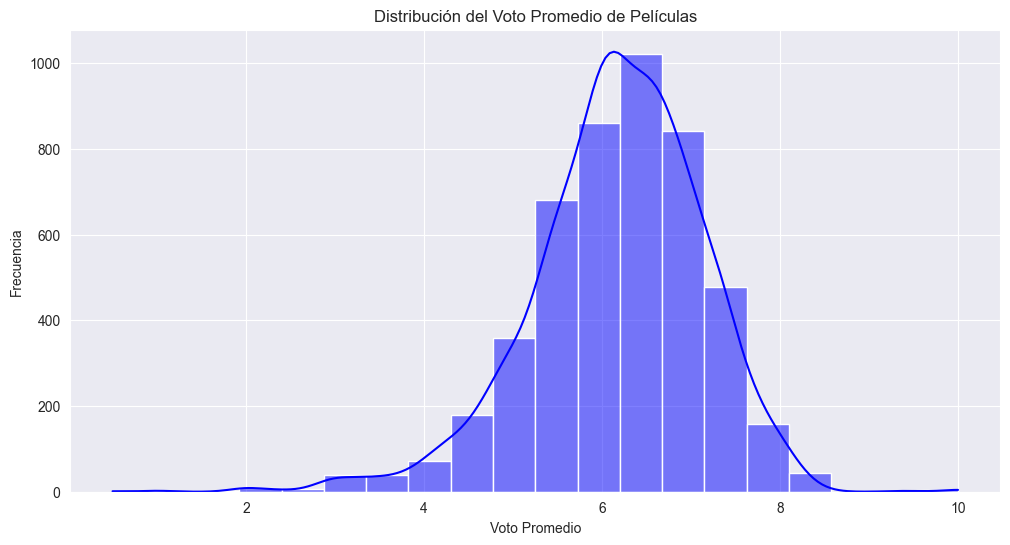

In [98]:
# Veamos la distribución del voto promedio en un histplot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='vote_average', bins=20, color='blue', kde=True)
plt.xlabel('Voto Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Voto Promedio de Películas')
plt.show()

*En este gráfico demostramos que una gran mayoría de las películas se encuentran dentro del rango de 5.5 y 7.5 de puntaje, siendo la mayor participación entre 6 y 7. Esto nos da la pauta que si bien es un factor importante a considerar, el por si solo no nos brinda la información suficiente para una recomendación eficiente.*

*5. Veamos como evoluciono la popularidad promedio a través de los años, pero tomando periodos de 10 años*

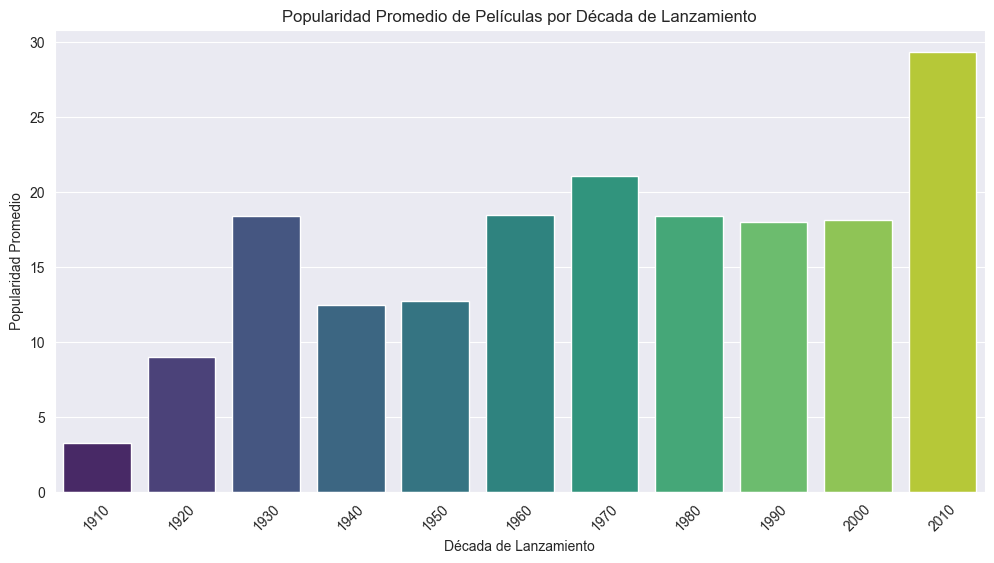

In [99]:
df['release_decade'] = df['release_year'] // 10 * 10

# Popularidad promedio por periodos de 10 años
popularity_by_decade = df.groupby('release_decade')['popularity'].mean().reset_index()

# Mostremos los datos en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='release_decade', y='popularity', data=popularity_by_decade, errorbar=None, palette='viridis')
plt.xlabel('Década de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio de Películas por Década de Lanzamiento')
plt.xticks(rotation=45)
plt.show()

*Como vemos la popularidad de las películas ha ido mejorando con el paso del tiempo, nuevamente tenemos a la popularidad como un valor candidato a considerar en el análisis de las recomendaciones.*

*6. Analicemos dos nuevos factores posibles a considerar, el presupuesto y las ganancias de cada película. Veamoslo como evolucionan ambos a través del tiempo.*

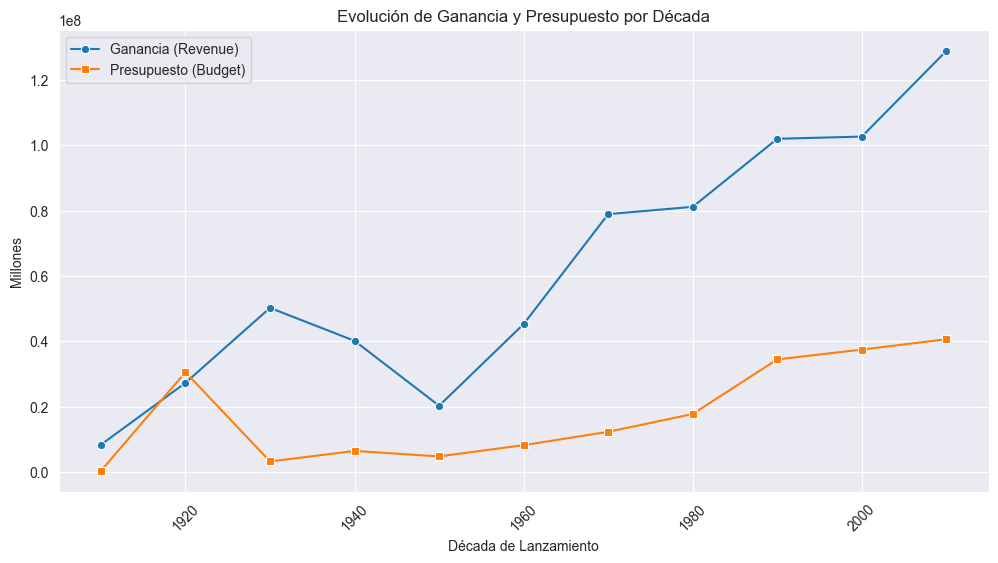

In [100]:
decade_stats = df.groupby('release_decade')[['revenue', 'budget']].mean().reset_index()

# Usemos un gráfico de líneas para mostrar la evolución de la ganancia y el presupuesto
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_stats, x='release_decade', y='revenue', label='Ganancia (Revenue)', marker='o')
sns.lineplot(data=decade_stats, x='release_decade', y='budget', label='Presupuesto (Budget)', marker='s')
plt.xlabel('Década de Lanzamiento')
plt.ylabel('Millones')
plt.title('Evolución de Ganancia y Presupuesto por Década')
plt.xticks(rotation=45)
plt.legend()
plt.show()

*Este gráfico nos muestra claramente como los presupuestos y ganancias han ido en aumento, pero con un marcado y fuerte incremento en las ganancias. O sea con el paso del tiempo estamos teniendo películas mucho mas rentables.*

## Bonus Track (denota mi edad jaja!!)

*Veamos algunos gráficos mas para ver que otros factores tenemos que tener en cuenta.*

*Pero antes veamos como es la distribución del voto promedio por genero para ver si hay algún género que sobresalga del resto.*

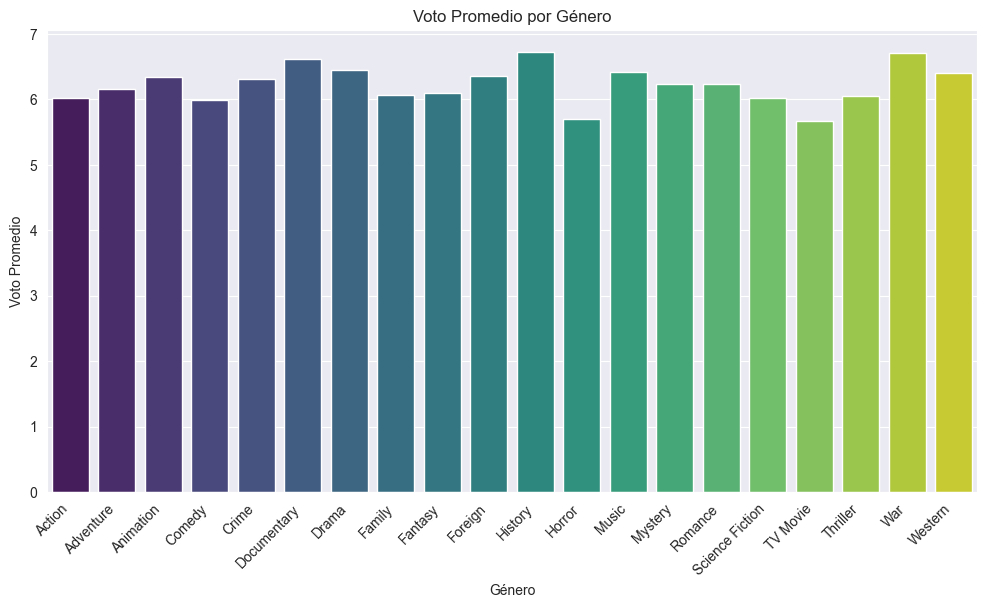

In [101]:
genre_df = df.explode('genre_names')  # Descomponer géneros en filas separadas
genre_average_vote = genre_df.groupby('genre_names')['vote_average'].mean().reset_index()

# Crear un gráfico de barras para mostrar el voto promedio por género
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='vote_average', data=genre_average_vote, palette='viridis')
plt.xlabel('Género')
plt.ylabel('Voto Promedio')
plt.title('Voto Promedio por Género')
plt.xticks(rotation=45, ha="right")
plt.show()

*Bueno este resultado no era el que uno esperaría, porque películas de Guerra, Documentales e Historicas se llevan el mayor voto promedio de estas. Quiza para un análisis mas profundo haya que ver que datos outliers pueden afectar el gráfico.*

*De la última clase hagamos una matriz de correlación para buscar datos relacionados que hayamos omitidos*

In [102]:
df[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(method='pearson')

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.457958,0.694934,0.238033,0.016082,0.555299
popularity,0.457958,1.000000,0.599448,0.221488,0.283621,0.774909
revenue,0.694934,0.599448,1.000000,0.219249,0.158516,0.746281
runtime,0.238033,0.221488,0.219249,1.000000,0.355621,0.273133
vote_average,0.016082,0.283621,0.158516,0.355621,1.000000,0.341213
vote_count,0.555299,0.774909,0.746281,0.273133,0.341213,1.000000


*Tenemos una alta correlación en la cantidad de votos con la popularidad y las ganancias (revenue).
Analicemos la cantidad de votos contra la popularidad, pero saquemos los outliers*

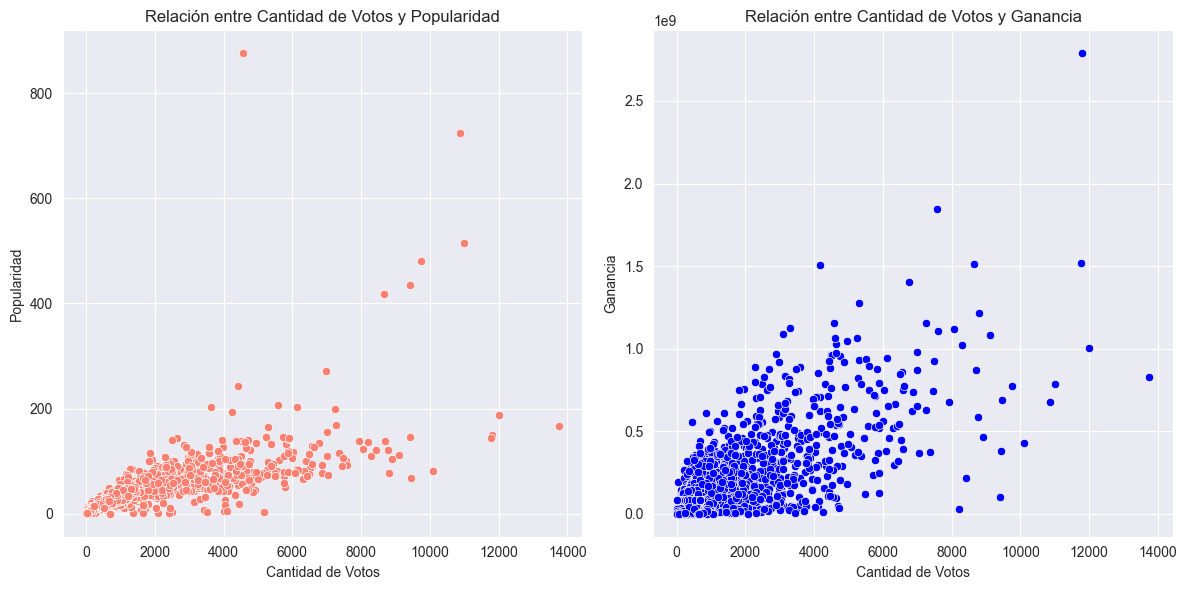

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico 1: Gráfico de dispersión para comparar 'vote_count' vs. 'popularity'
sns.scatterplot(data=df, x='vote_count', y='popularity', color='salmon', ax=axes[0])
axes[0].set_xlabel('Cantidad de Votos')
axes[0].set_ylabel('Popularidad')
axes[0].set_title('Relación entre Cantidad de Votos y Popularidad')

# Gráfico 2: Gráfico de dispersión para comparar 'vote_count' vs. 'revenue'
sns.scatterplot(data=df, x='vote_count', y='revenue', color='blue', ax=axes[1])
axes[1].set_xlabel('Cantidad de Votos')
axes[1].set_ylabel('Ganancia')
axes[1].set_title('Relación entre Cantidad de Votos y Ganancia')

plt.tight_layout()
plt.show()


*Ajustemos los gráficos tomando el rango intercuartil para quitar outliers*

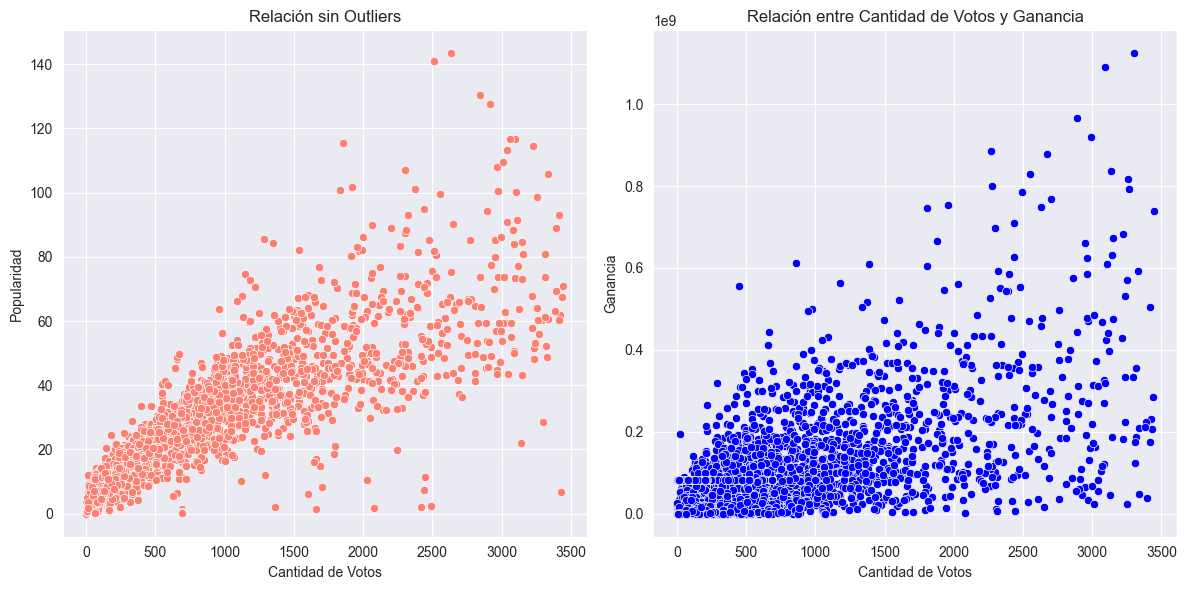

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Usemos el rango intercuartil (IQR) para 'vote_count'
Q1 = df['vote_count'].quantile(0.25)
Q3 = df['vote_count'].quantile(0.75)
IQR = Q3 - Q1

# Definimos un umbral
umbral = 4  
#Al incrementarlo podemos ir viendo los cambios y aceptando mas datos

# Filtramos los outliers basados en el IQR
df_sin_outliers = df[(df['vote_count'] >= (Q1 - umbral * IQR)) & (df['vote_count'] <= (Q3 + umbral * IQR))]

# Creamos un gráfico de dispersión sin los outliers
sns.scatterplot(data=df_sin_outliers, x='vote_count', y='popularity', color='salmon', ax=axes[0])
axes[0].set_xlabel('Cantidad de Votos')
axes[0].set_ylabel('Popularidad')
axes[0].set_title('Relación sin Outliers')

sns.scatterplot(data=df_sin_outliers, x='vote_count', y='revenue', color='blue', ax=axes[1])
axes[1].set_xlabel('Cantidad de Votos')
axes[1].set_ylabel('Ganancia')
axes[1].set_title('Relación entre Cantidad de Votos y Ganancia')

plt.tight_layout()
plt.show()

*Efectivamente tenemos una relación muy marcada entre la cantidad de votos y su popularidad, y al modificar el valor de umbral podemos ver mas datos (al aumentarlo) o achicar la muestra (al disminuirlo).
Esto ya nos esta dando la pauta que ambas variables son de extrema importancia para predecir la recomendación de las películas.
En cambio Cantidad de votos vs. Ganancia muestra un mayor indice de dispersión por lo que la ganancia no viene a se un factor importante a considerar en el análisis.*